<a href="https://colab.research.google.com/github/samyamehta16/machinelearning/blob/main/model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/stock_price.csv')

data

,Date,Close
0,2022-01-03,58.099998
1,2022-01-04,59.389999
2,2022-01-05,58.779999
3,2022-01-06,59.360001
4,2022-01-07,60.779999
5,2022-01-10,60.730000
6,2022-01-11,61.130001
7,2022-01-12,61.180000
8,2022-01-13,61.490002
9,2022-01-14,61.630001


In [5]:
y = data['Close']

y

0     58.099998
1     59.389999
2     58.779999
3     59.360001
4     60.779999
5     60.730000
6     61.130001
7     61.180000
8     61.490002
9     61.630001
10    60.910000
11    59.590000
12    59.090000
13    58.150002
14    58.959999
15    58.320000
16    58.650002
17    58.270000
18    58.889999
19    59.660000
20    60.580002
21    61.389999
22    61.099998
23    61.270000
Name: Close, dtype: float64

In [6]:
x = data.drop('Close', axis=1)

x

,Date
0,2022-01-03
1,2022-01-04
2,2022-01-05
3,2022-01-06
4,2022-01-07
5,2022-01-10
6,2022-01-11
7,2022-01-12
8,2022-01-13
9,2022-01-14


In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


In [9]:
X_train

,Date
5,2022-01-10
12,2022-01-20
22,2022-02-03
11,2022-01-19
4,2022-01-07
23,2022-02-04
0,2022-01-03
1,2022-01-04
20,2022-02-01
14,2022-01-24


In [10]:
X_test

,Date
6,2022-01-11
9,2022-01-14
18,2022-01-28
21,2022-02-02
13,2022-01-21


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
import pandas as pd

X_train['Date'] = pd.to_datetime(X_train['Date'])

# Converting dates to numerical representation (days since a reference date)
X_train['Date'] = (X_train['Date'] - pd.Timestamp('1970-01-01')).dt.days

# Repeating the same process for X_test
X_test['Date'] = pd.to_datetime(X_test['Date'])
X_test['Date'] = (X_test['Date'] - pd.Timestamp('1970-01-01')).dt.days

model = LinearRegression()
model.fit(X_train, y_train)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_lr_train_pred = model.predict(X_train)
y_lr_test_pred = model.predict(X_test)

In [16]:
y_lr_train_pred

array([59.68179475, 59.82191269, 60.0180778 , 59.8079009 , 59.63975937,
       60.03208959, 59.5837122 , 59.59772399, 59.99005421, 59.87795986,
       59.97604242, 59.91999524, 59.61173579, 59.7938891 , 59.90598345,
       59.89197166, 59.70981834, 59.62574758, 59.72383013])

In [17]:
y_lr_test_pred

array([59.69580655, 59.73784193, 59.93400704, 60.004066  , 59.83592448])

Text(0.5, 0, 'Date')

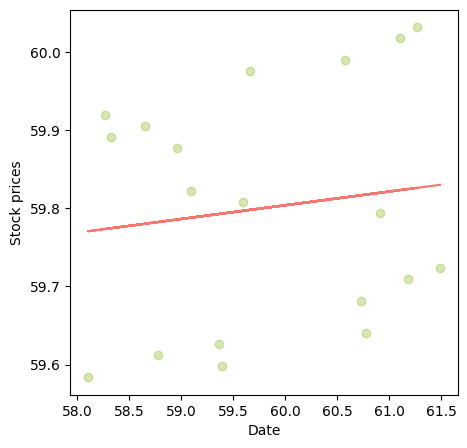

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Stock prices')
plt.xlabel('Date')
